# Import Libraries

In [1]:
# import all libraries for data analysis and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [2]:
# import a csv file using pandas
df = pd.read_csv('dataset_31_credit-g.csv')
# shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,18.0,existing paid,radio/tv,3190.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,24.0,none,own,1.0,skilled,1.0,none,yes,bad
1,<0,18.0,existing paid,new car,4380.0,100<=X<500,1<=X<4,3.0,male single,none,...,car,35.0,none,own,1.0,unskilled resident,2.0,yes,yes,good
2,<0,24.0,all paid,new car,2325.0,100<=X<500,4<=X<7,2.0,male single,none,...,car,32.0,bank,own,1.0,skilled,1.0,none,yes,good
3,>=200,12.0,existing paid,radio/tv,1297.0,<100,1<=X<4,3.0,male mar/wid,none,...,real estate,23.0,none,rent,1.0,skilled,1.0,none,yes,good
4,no checking,33.0,critical/other existing credit,used car,7253.0,<100,4<=X<7,3.0,male single,none,...,car,35.0,none,own,2.0,high qualif/self emp/mgmt,1.0,yes,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,18.0,all paid,new car,6458.0,<100,>=7,2.0,male single,none,...,no known property,39.0,bank,own,2.0,high qualif/self emp/mgmt,2.0,yes,yes,bad
996,no checking,18.0,existing paid,new car,2662.0,no known savings,4<=X<7,4.0,male single,none,...,life insurance,32.0,none,own,1.0,skilled,1.0,none,no,good
997,no checking,24.0,critical/other existing credit,used car,5804.0,>=1000,1<=X<4,4.0,male single,none,...,real estate,27.0,none,own,2.0,skilled,1.0,none,yes,good
998,0<=X<200,12.0,existing paid,radio/tv,1484.0,no known savings,1<=X<4,2.0,male mar/wid,none,...,real estate,25.0,none,own,1.0,skilled,1.0,yes,yes,bad


# Data wrangling and visualization

In [3]:
# drop na values
df = df.dropna()
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,18.0,existing paid,radio/tv,3190.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,24.0,none,own,1.0,skilled,1.0,none,yes,bad
1,<0,18.0,existing paid,new car,4380.0,100<=X<500,1<=X<4,3.0,male single,none,...,car,35.0,none,own,1.0,unskilled resident,2.0,yes,yes,good
2,<0,24.0,all paid,new car,2325.0,100<=X<500,4<=X<7,2.0,male single,none,...,car,32.0,bank,own,1.0,skilled,1.0,none,yes,good
3,>=200,12.0,existing paid,radio/tv,1297.0,<100,1<=X<4,3.0,male mar/wid,none,...,real estate,23.0,none,rent,1.0,skilled,1.0,none,yes,good
4,no checking,33.0,critical/other existing credit,used car,7253.0,<100,4<=X<7,3.0,male single,none,...,car,35.0,none,own,2.0,high qualif/self emp/mgmt,1.0,yes,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,18.0,all paid,new car,6458.0,<100,>=7,2.0,male single,none,...,no known property,39.0,bank,own,2.0,high qualif/self emp/mgmt,2.0,yes,yes,bad
996,no checking,18.0,existing paid,new car,2662.0,no known savings,4<=X<7,4.0,male single,none,...,life insurance,32.0,none,own,1.0,skilled,1.0,none,no,good
997,no checking,24.0,critical/other existing credit,used car,5804.0,>=1000,1<=X<4,4.0,male single,none,...,real estate,27.0,none,own,2.0,skilled,1.0,none,yes,good
998,0<=X<200,12.0,existing paid,radio/tv,1484.0,no known savings,1<=X<4,2.0,male mar/wid,none,...,real estate,25.0,none,own,1.0,skilled,1.0,yes,yes,bad


array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'credit_amount'}>,
        <Axes: title={'center': 'installment_commitment'}>],
       [<Axes: title={'center': 'residence_since'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'existing_credits'}>],
       [<Axes: title={'center': 'num_dependents'}>, <Axes: >, <Axes: >]],
      dtype=object)

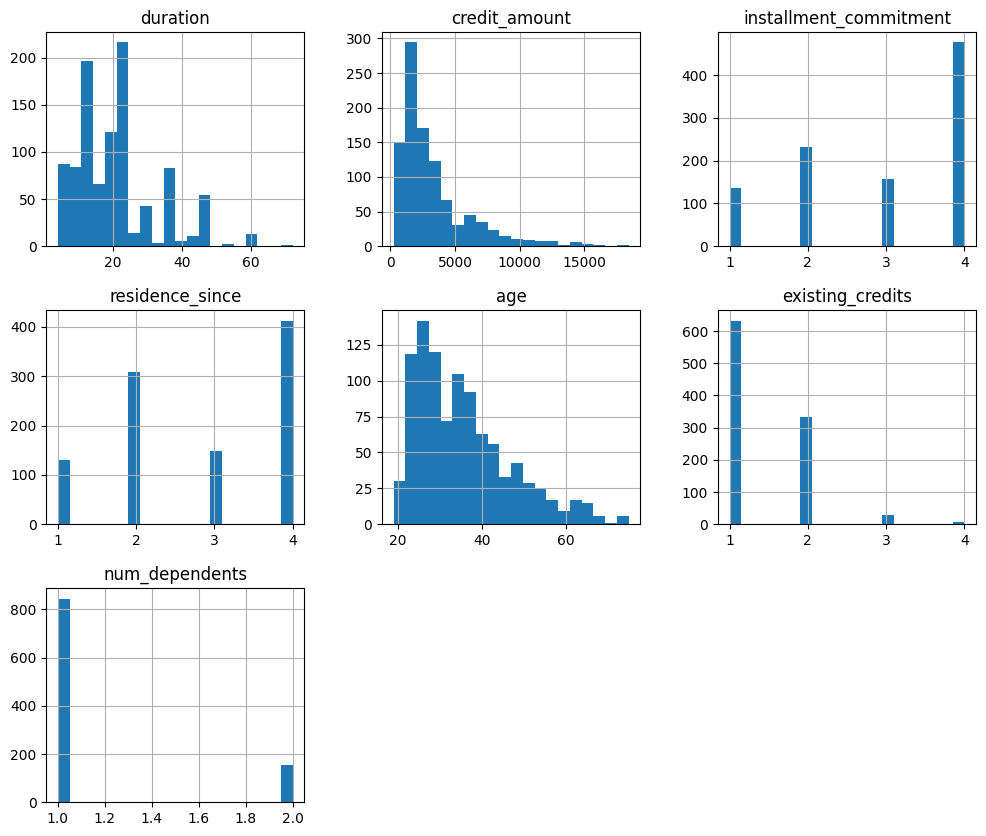

In [4]:
# Visualize the data using histograms
df.hist(figsize=(12, 10), bins=20)

## Convert categorical values into numerical values

In [5]:
# one-hot encode categorical variables using 0s and 1s
df = pd.get_dummies(df, drop_first=True)*1
df

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,...,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes,class_good
0,18.0,3190.0,2.0,2.0,24.0,1.0,1.0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
1,18.0,4380.0,3.0,4.0,35.0,1.0,2.0,1,0,0,...,1,0,1,0,0,0,1,1,1,1
2,24.0,2325.0,2.0,3.0,32.0,1.0,1.0,1,0,0,...,0,0,1,0,1,0,0,0,1,1
3,12.0,1297.0,3.0,4.0,23.0,1.0,1.0,0,1,0,...,1,0,0,1,1,0,0,0,1,1
4,33.0,7253.0,3.0,2.0,35.0,2.0,1.0,0,0,1,...,1,0,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.0,6458.0,2.0,4.0,39.0,2.0,2.0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
996,18.0,2662.0,4.0,3.0,32.0,1.0,1.0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
997,24.0,5804.0,4.0,2.0,27.0,2.0,1.0,0,0,1,...,1,0,1,0,1,0,0,0,1,1
998,12.0,1484.0,2.0,1.0,25.0,1.0,1.0,0,0,0,...,1,0,1,0,1,0,0,1,1,0


In [6]:
# create class_bad
df['class_bad'] = 1-df['class_good'] 
# drop class_good
df = df.drop('class_good', axis=1)
df

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,...,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes,class_bad
0,18.0,3190.0,2.0,2.0,24.0,1.0,1.0,1,0,0,...,1,0,1,0,1,0,0,0,1,1
1,18.0,4380.0,3.0,4.0,35.0,1.0,2.0,1,0,0,...,1,0,1,0,0,0,1,1,1,0
2,24.0,2325.0,2.0,3.0,32.0,1.0,1.0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,12.0,1297.0,3.0,4.0,23.0,1.0,1.0,0,1,0,...,1,0,0,1,1,0,0,0,1,0
4,33.0,7253.0,3.0,2.0,35.0,2.0,1.0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.0,6458.0,2.0,4.0,39.0,2.0,2.0,0,0,1,...,0,0,1,0,0,0,0,1,1,1
996,18.0,2662.0,4.0,3.0,32.0,1.0,1.0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
997,24.0,5804.0,4.0,2.0,27.0,2.0,1.0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
998,12.0,1484.0,2.0,1.0,25.0,1.0,1.0,0,0,0,...,1,0,1,0,1,0,0,1,1,1


## Now Visualize Again

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'credit_amount'}>,
        <Axes: title={'center': 'installment_commitment'}>,
        <Axes: title={'center': 'residence_since'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'existing_credits'}>,
        <Axes: title={'center': 'num_dependents'}>],
       [<Axes: title={'center': 'checking_status_<0'}>,
        <Axes: title={'center': 'checking_status_>=200'}>,
        <Axes: title={'center': 'checking_status_no checking'}>,
        <Axes: title={'center': 'credit_history_critical/other existing credit'}>,
        <Axes: title={'center': 'credit_history_delayed previously'}>,
        <Axes: title={'center': 'credit_history_existing paid'}>,
        <Axes: title={'center': 'credit_history_no credits/all paid'}>],
       [<Axes: title={'center': 'purpose_domestic appliance'}>,
        <Axes: title={'center': 'purpose_education'}>,
        <Axes: title={'center': 'purpose_furniture

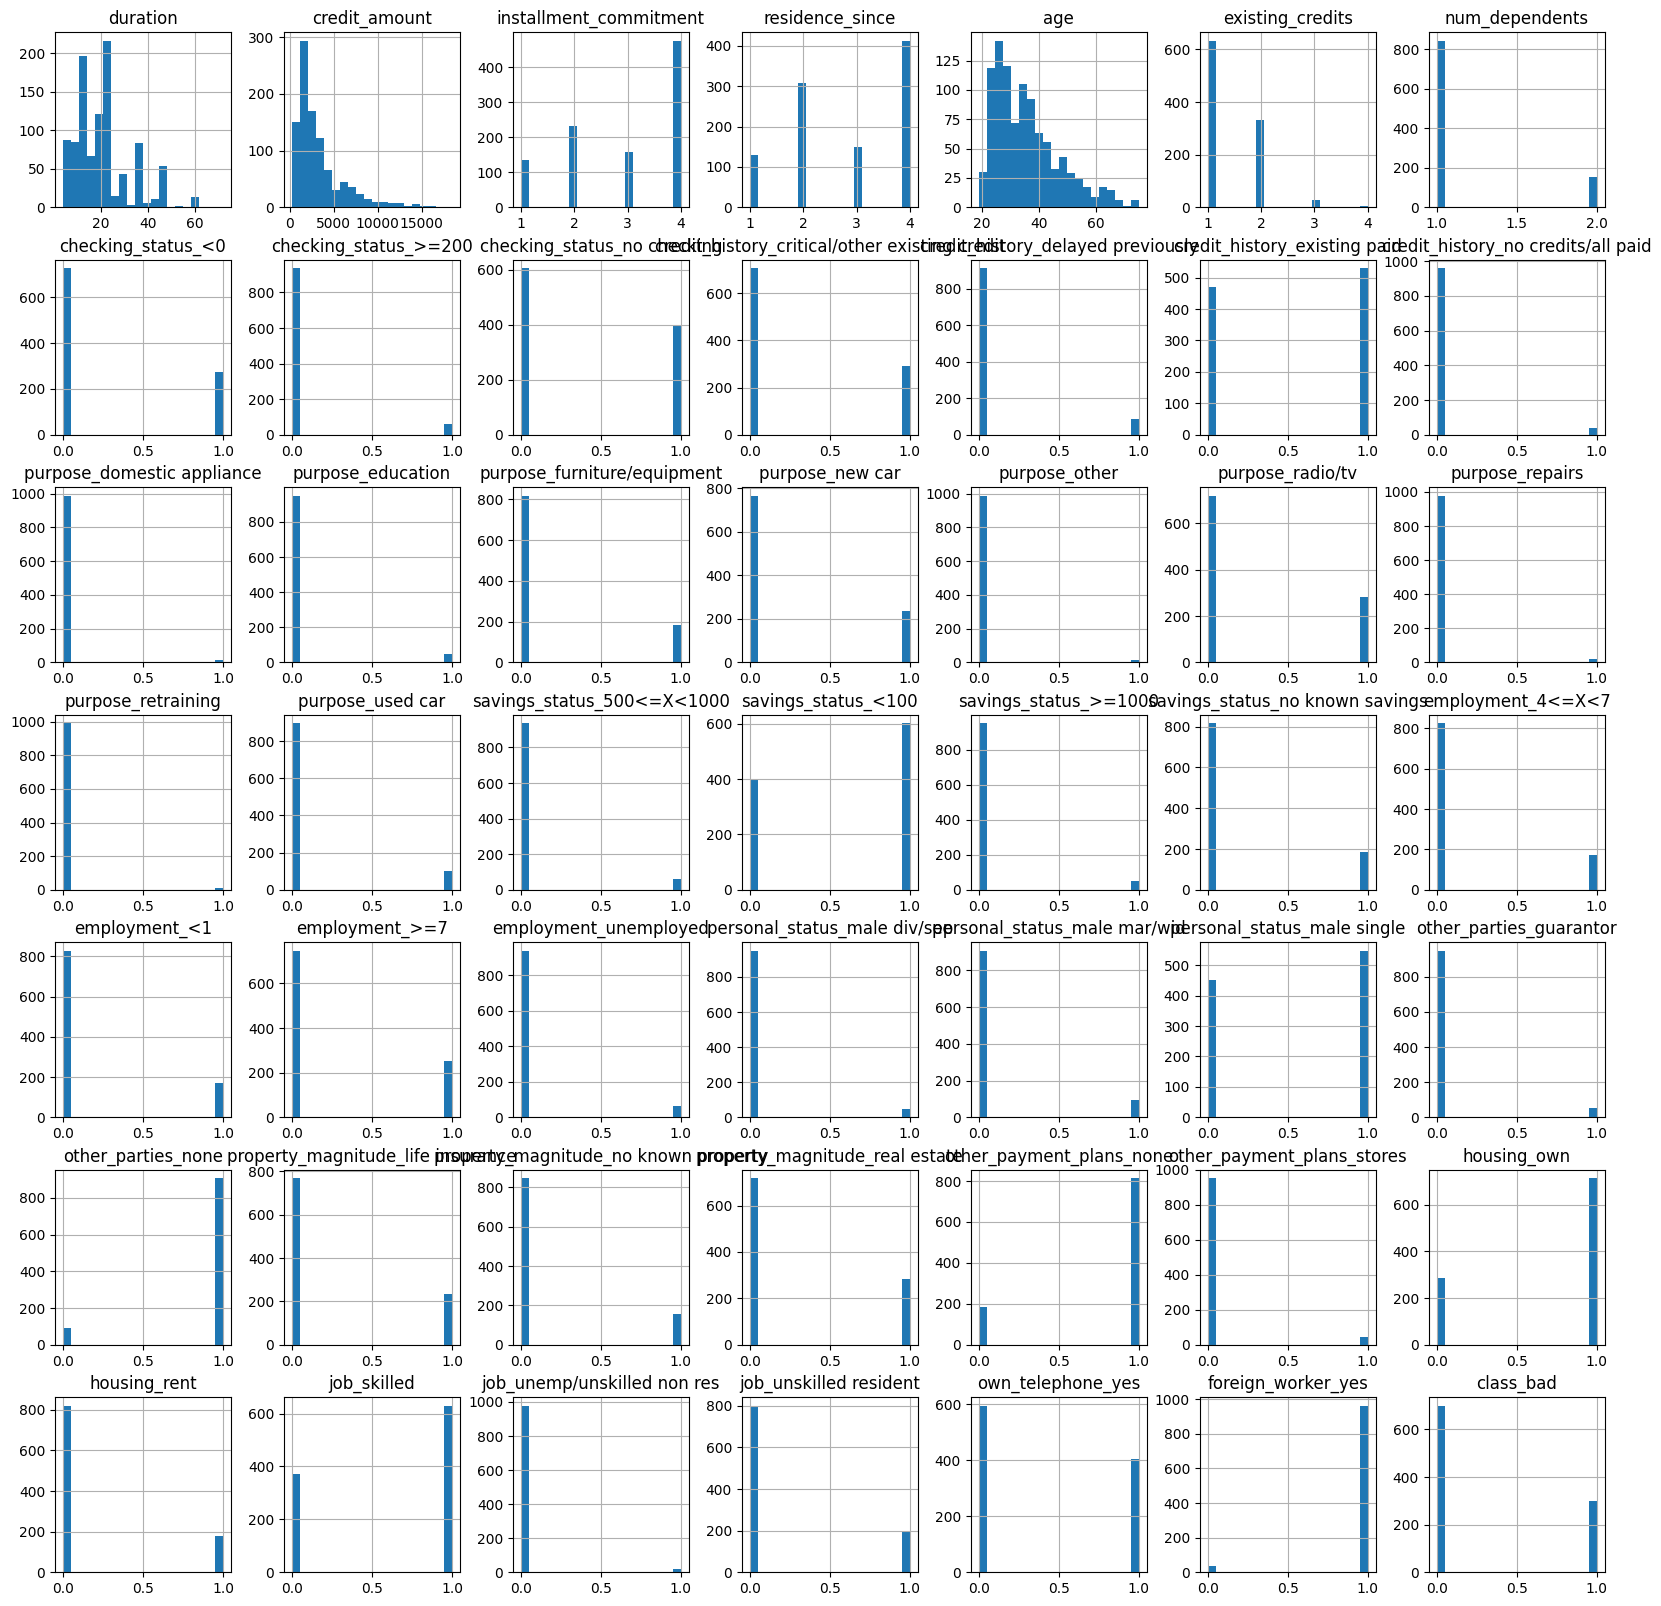

In [7]:
# Visualize the data using histograms
df.hist(figsize=(20, 20), bins=20)

## Correlation Matrix

<Axes: >

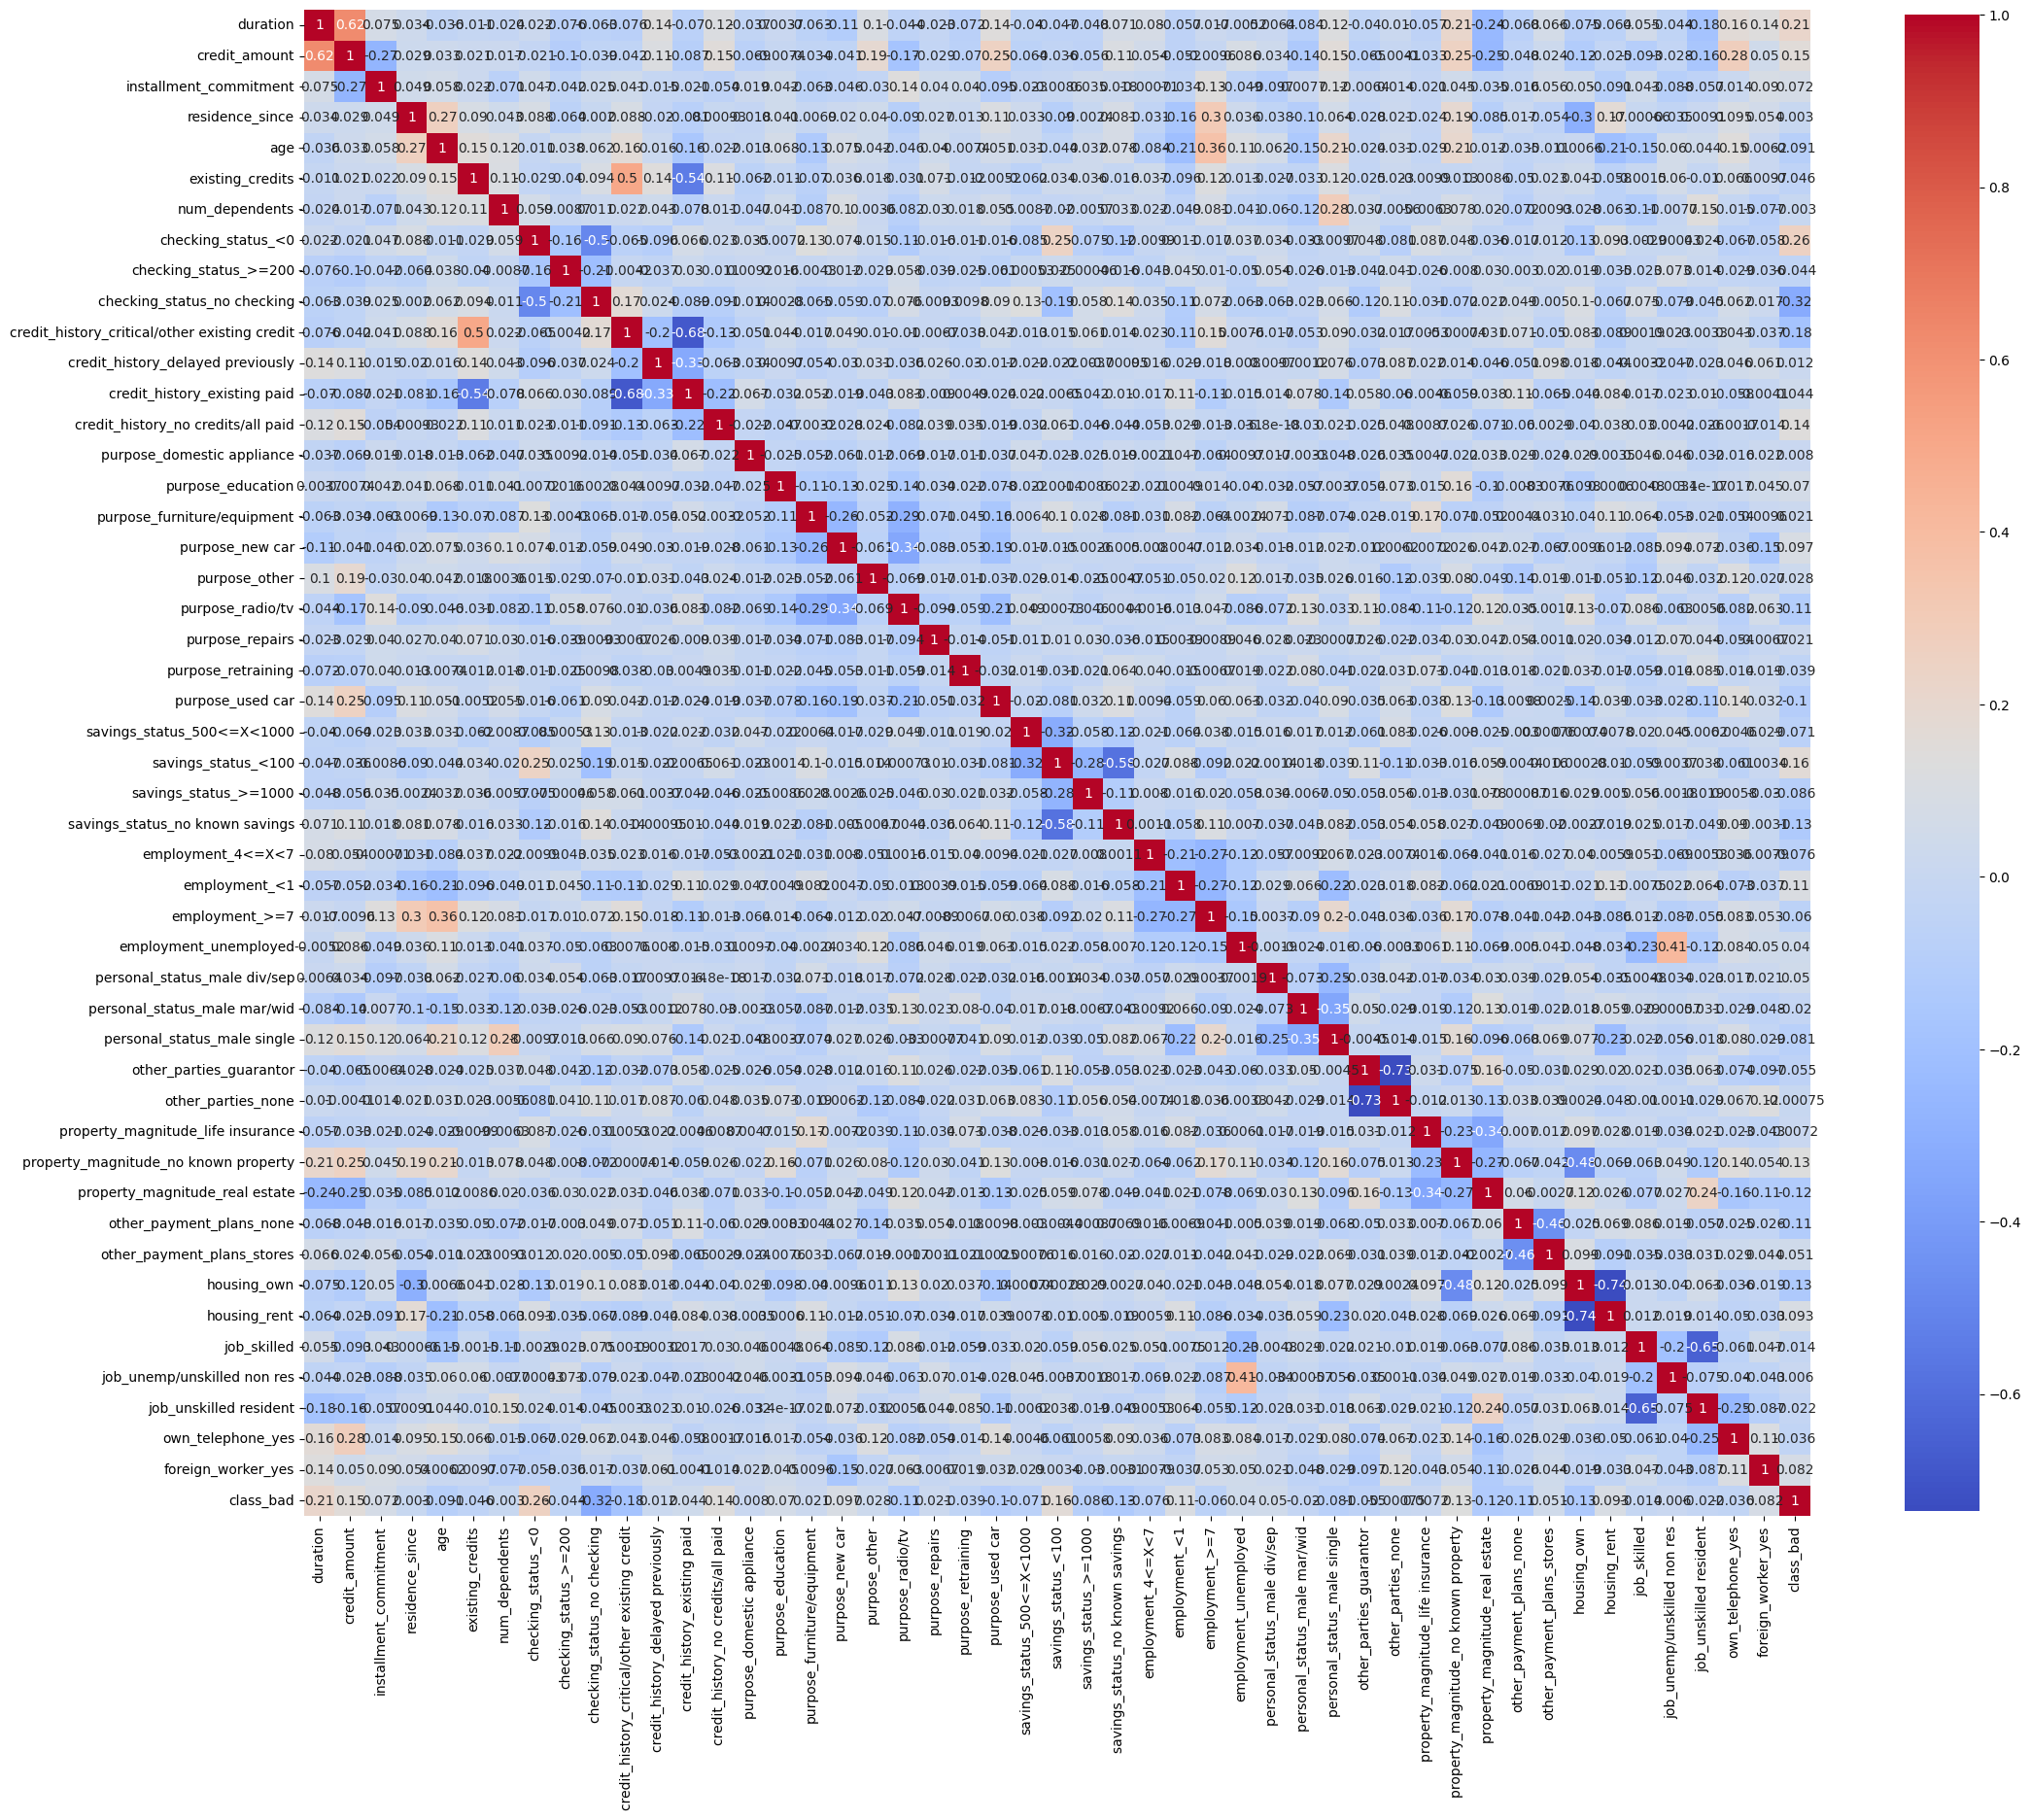

In [8]:
# correlation matrix
corr = df.corr()
# visualize the correlation matrix using a heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot= True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Training

In [9]:
# Train a decision tree classifier
X = df.drop('class_bad', axis=1)
y = df['class_bad']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,...,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
29,12.0,2859.0,4.0,4.0,38.0,1.0,1.0,0,0,1,...,0,1,0,1,0,0,0,0,1,1
535,9.0,2136.0,3.0,2.0,25.0,1.0,1.0,1,0,0,...,1,1,0,1,0,1,0,0,0,1
695,18.0,5302.0,2.0,4.0,36.0,3.0,1.0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
557,14.0,8978.0,1.0,4.0,45.0,1.0,1.0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
836,15.0,4623.0,3.0,2.0,40.0,1.0,1.0,0,0,1,...,0,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,9.0,1199.0,4.0,4.0,67.0,2.0,1.0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
270,12.0,1934.0,2.0,2.0,26.0,2.0,1.0,0,0,1,...,0,1,0,1,0,1,0,0,0,1
860,36.0,14318.0,4.0,2.0,57.0,1.0,1.0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
435,12.0,1567.0,1.0,1.0,22.0,1.0,1.0,0,0,0,...,0,1,0,1,0,1,0,0,1,1


In [10]:
# standardize the data
# Numeric and categorical feature handling separately within pipeline
numeric_cols = X.select_dtypes(include=['float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_train

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,...,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
29,-0.724218,-0.143798,0.928252,1.026704,0.193452,-0.694745,-0.434405,0,0,1,...,0,1,0,1,0,0,0,0,1,1
535,-0.971146,-0.401150,0.034628,-0.788463,-0.933663,-0.694745,-0.434405,1,0,0,...,1,1,0,1,0,1,0,0,0,1
695,-0.230363,0.725789,-0.858996,1.026704,0.020050,2.834118,-0.434405,1,0,0,...,0,1,0,0,0,0,0,0,1,1
557,-0.559600,2.034262,-1.752620,1.026704,0.800360,-0.694745,-0.434405,1,0,0,...,0,1,0,1,0,0,0,0,1,0
836,-0.477290,0.484099,0.034628,-0.788463,0.366854,-0.694745,-0.434405,0,0,1,...,0,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.971146,-0.734675,0.928252,1.026704,2.707785,1.069687,-0.434405,0,0,0,...,0,1,0,1,0,0,0,0,1,1
270,-0.724218,-0.473052,-0.858996,-0.788463,-0.846962,1.069687,-0.434405,0,0,1,...,0,1,0,1,0,1,0,0,0,1
860,1.251203,3.935036,0.928252,-0.788463,1.840773,-0.694745,-0.434405,0,0,0,...,0,1,0,0,0,0,0,0,1,1
435,-0.724218,-0.603685,-1.752620,-1.696046,-1.193766,-0.694745,-0.434405,0,0,0,...,0,1,0,1,0,1,0,0,1,1


Accuracy: 0.655


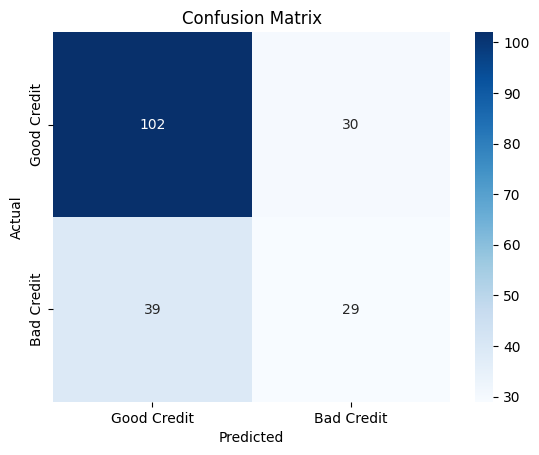

In [11]:
# train a decision tree classifier
clf = sklearn.tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# make predictions
y_pred = clf.predict(X_test)
# evaluate the model
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
# visualize the confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good Credit', 'Bad Credit'], yticklabels=['Good Credit', 'Bad Credit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
unique, counts = np.unique(y_test, return_counts=True)
print("Unique classes in y_test:", unique)
print("Counts of each class in y_test:", counts)

Unique classes in y_test: [0 1]
Counts of each class in y_test: [132  68]


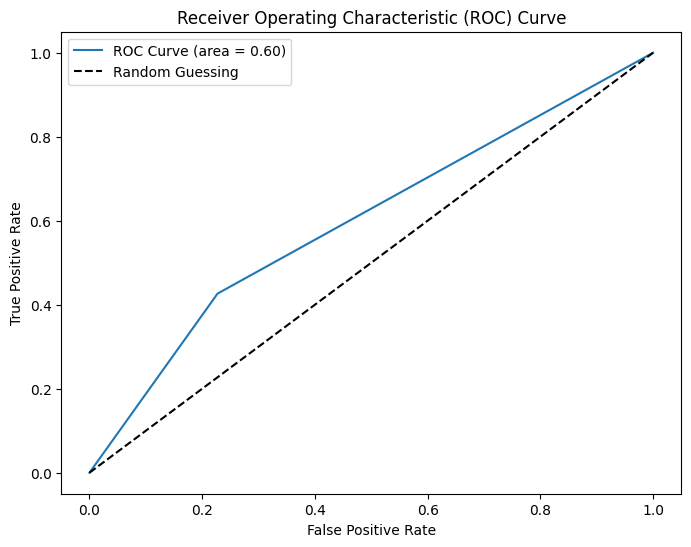

In [13]:
# plot the ROC curve
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Hyperparameter Tuning

In [14]:
# Train a decision tree classifier
X = df.drop('class_bad', axis=1)
y = df['class_bad']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,...,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
29,12.0,2859.0,4.0,4.0,38.0,1.0,1.0,0,0,1,...,0,1,0,1,0,0,0,0,1,1
535,9.0,2136.0,3.0,2.0,25.0,1.0,1.0,1,0,0,...,1,1,0,1,0,1,0,0,0,1
695,18.0,5302.0,2.0,4.0,36.0,3.0,1.0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
557,14.0,8978.0,1.0,4.0,45.0,1.0,1.0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
836,15.0,4623.0,3.0,2.0,40.0,1.0,1.0,0,0,1,...,0,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,9.0,1199.0,4.0,4.0,67.0,2.0,1.0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
270,12.0,1934.0,2.0,2.0,26.0,2.0,1.0,0,0,1,...,0,1,0,1,0,1,0,0,0,1
860,36.0,14318.0,4.0,2.0,57.0,1.0,1.0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
435,12.0,1567.0,1.0,1.0,22.0,1.0,1.0,0,0,0,...,0,1,0,1,0,1,0,0,1,1


Max Depth: 3, Min Samples Split: 2, Fold Recall: 0.4681
Max Depth: 3, Min Samples Split: 2, Fold Recall: 0.2609
Max Depth: 3, Min Samples Split: 2, Fold Recall: 0.1176
Max Depth: 3, Min Samples Split: 2, Fold Recall: 0.1333
Max Depth: 3, Min Samples Split: 2, Fold Recall: 0.4186
Max Depth: 3, Min Samples Split: 5, Fold Recall: 0.4681
Max Depth: 3, Min Samples Split: 5, Fold Recall: 0.2609
Max Depth: 3, Min Samples Split: 5, Fold Recall: 0.1176
Max Depth: 3, Min Samples Split: 5, Fold Recall: 0.1333
Max Depth: 3, Min Samples Split: 5, Fold Recall: 0.4186
Max Depth: 3, Min Samples Split: 10, Fold Recall: 0.4681
Max Depth: 3, Min Samples Split: 10, Fold Recall: 0.2609
Max Depth: 3, Min Samples Split: 10, Fold Recall: 0.1176
Max Depth: 3, Min Samples Split: 10, Fold Recall: 0.1333
Max Depth: 3, Min Samples Split: 10, Fold Recall: 0.4186
Max Depth: 3, Min Samples Split: 20, Fold Recall: 0.4681
Max Depth: 3, Min Samples Split: 20, Fold Recall: 0.2609
Max Depth: 3, Min Samples Split: 20, Fold

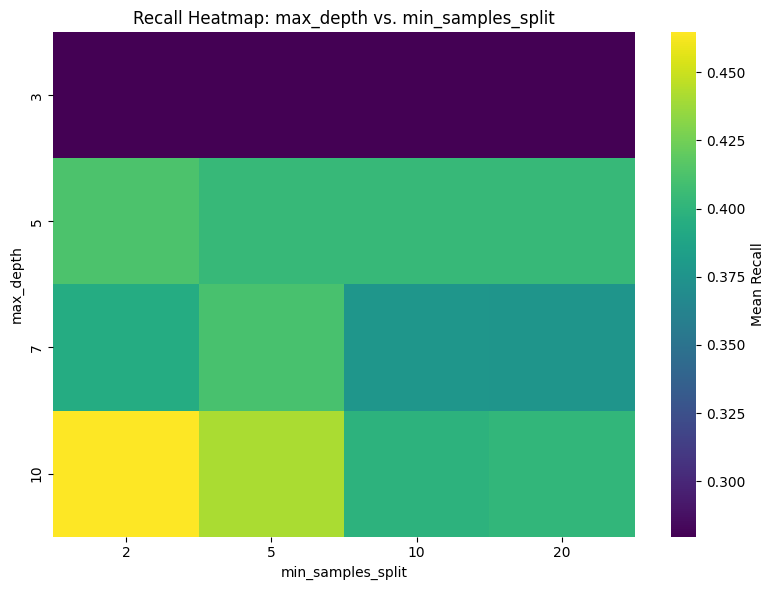

({'max_depth': 10, 'min_samples_split': 2}, 0.4646713880498021)

In [15]:
# Manual 5-fold cross-validation for hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20]
}

# Track best hyperparameters
best_score = 0
best_params = None
# Initialize results storage
results = []
# Manual grid search
for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        fold_recalls = []
        for train_idx, val_idx in kf.split(X_train):
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
            X_tr[numeric_cols] = scaler.fit_transform(X_tr[numeric_cols])
            X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

            model = sklearn.tree.DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42
            )
            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_val)
            # use recall as the evaluation metric
            recall = recall_score(y_val, y_pred)
            fold_recalls.append(recall)
            print(f"Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Fold Recall: {recall:.4f}")
            
        mean_recall = np.mean(fold_recalls)
        results.append((max_depth, min_samples_split, mean_recall))
        if mean_recall > best_score:
            best_score = mean_recall
            best_params = {
                'max_depth': max_depth,
                'min_samples_split': min_samples_split
            }
# Convert to DataFrame for plotting
results_df = pd.DataFrame(results, columns=["max_depth", "min_samples_split", "mean_recall"])
pivot_table = results_df.pivot(index="max_depth", columns="min_samples_split", values="mean_recall")


# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=False, cmap="viridis", cbar_kws={'label': 'Mean Recall'})
plt.title("Recall Heatmap: max_depth vs. min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()
best_params, best_score


Recall 0.4264705882352941


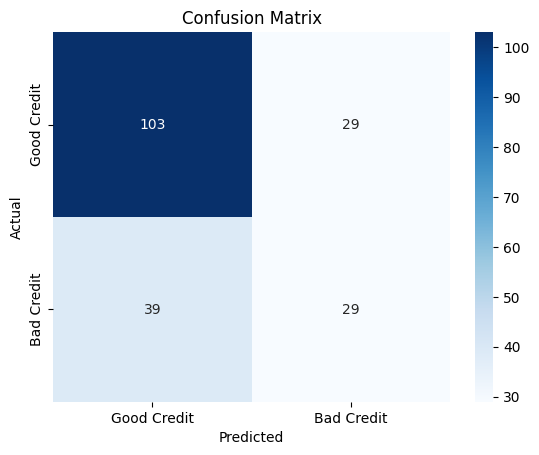

In [16]:
# train a decision tree classifier
clf = sklearn.tree.DecisionTreeClassifier(random_state=42, 
                                           max_depth=best_params['max_depth'], 
                                           min_samples_split=best_params['min_samples_split'])
clf.fit(X_train, y_train)
# make predictions
y_pred = clf.predict(X_test)
# evaluate the model
print("Recall", sklearn.metrics.recall_score(y_test, y_pred))
# visualize the confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good Credit', 'Bad Credit'], yticklabels=['Good Credit','Bad Credit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

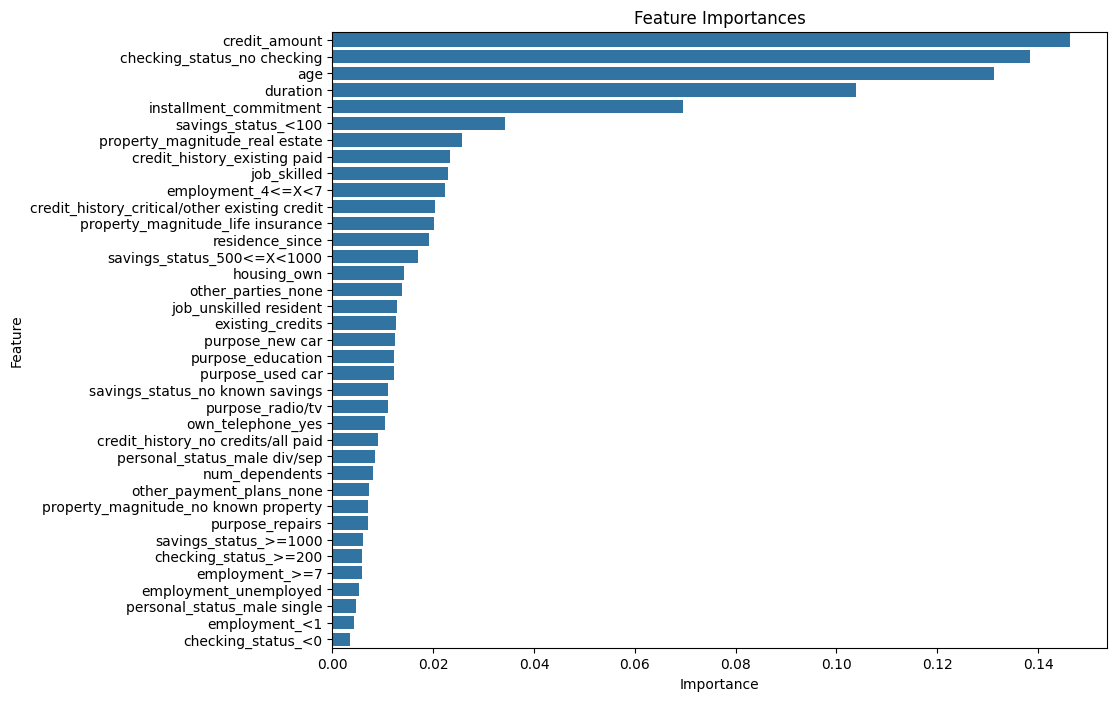

In [17]:
# Feature importance
feature_importances = clf.feature_importances_
# Only keep non-zero importances
non_zero_indices = np.where(feature_importances > 0)[0]
feature_importances = feature_importances[non_zero_indices]
# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns[non_zero_indices],
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
